# Analyse du dataset Pokemon

In [107]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import  LogisticRegression 
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [62]:
file="../data/All_Pokemon.csv"

In [63]:
df = pd.read_csv(file, delimiter=",", encoding='utf-8')

In [64]:
df.head()

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


In [65]:
df.shape

(1032, 44)

In [66]:
df.columns

Index(['Number', 'Name', 'Type 1', 'Type 2', 'Abilities', 'HP', 'Att', 'Def',
       'Spa', 'Spd', 'Spe', 'BST', 'Mean', 'Standard Deviation', 'Generation',
       'Experience type', 'Experience to level 100', 'Final Evolution',
       'Catch Rate', 'Legendary', 'Mega Evolution', 'Alolan Form',
       'Galarian Form', 'Against Normal', 'Against Fire', 'Against Water',
       'Against Electric', 'Against Grass', 'Against Ice', 'Against Fighting',
       'Against Poison', 'Against Ground', 'Against Flying', 'Against Psychic',
       'Against Bug', 'Against Rock', 'Against Ghost', 'Against Dragon',
       'Against Dark', 'Against Steel', 'Against Fairy', 'Height', 'Weight',
       'BMI'],
      dtype='object')

Colonnes inutiles :
"BST", "Mean", "Standard Deviation", "Generation", 'Experience to level 100', 'Final Evolution', 'Catch Rate', 'Legendary', 'Mega Evolution', 'Alolan Form', 'Galarian Form',  "Height", "Weight", "BMI"

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number                   1032 non-null   int64  
 1   Name                     1032 non-null   object 
 2   Type 1                   1032 non-null   object 
 3   Type 2                   548 non-null    object 
 4   Abilities                1032 non-null   object 
 5   HP                       1032 non-null   int64  
 6   Att                      1032 non-null   int64  
 7   Def                      1032 non-null   int64  
 8   Spa                      1032 non-null   int64  
 9   Spd                      1032 non-null   int64  
 10  Spe                      1032 non-null   int64  
 11  BST                      1032 non-null   int64  
 12  Mean                     1032 non-null   float64
 13  Standard Deviation       1032 non-null   float64
 14  Generation              

In [68]:
df.describe()

,Number,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,...,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,439.226744,69.906008,80.526163,74.609496,72.918605,72.139535,68.548450,438.648256,73.108043,20.028104,...,1.002180,1.239826,1.025678,0.974806,1.074855,0.992006,1.094234,1.286822,71.879845,136.735756
std,261.871350,26.189155,32.542374,30.905972,32.773495,27.625876,30.219526,120.675545,20.112591,10.830298,...,0.613111,0.699361,0.577269,0.378040,0.475292,0.511859,0.535159,1.391501,132.872741,3111.666658
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,29.166667,0.000000,...,0.250000,0.250000,0.000000,0.000000,0.250000,0.250000,0.250000,0.100000,0.100000,0.000000
25%,211.750000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,330.000000,55.000000,12.801910,...,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.600000,9.000000,18.600000
50%,434.500000,67.000000,78.000000,70.000000,65.000000,70.000000,65.000000,459.000000,76.500000,18.484228,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.750000,28.350000
75%,667.250000,83.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.000000,85.833333,24.835709,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.600000,71.275000,42.200000
max,898.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,780.000000,130.000000,103.215659,...,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,20.000000,999.900000,99990.000000


In [69]:
print(df["Type 1"].unique())
print(df["Type 2"].unique())

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Dark' 'Poison' 'Electric' 'Ground'
 'Ice' 'Fairy' 'Steel' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Dragon'
 'Flying']
['Poison' nan 'Flying' 'Dragon' 'Normal' 'Psychic' 'Steel' 'Ground'
 'Fairy' 'Grass' 'Fighting' 'Electric' 'Ice' 'Dark' 'Ghost' 'Rock' 'Water'
 'Fire' 'Bug']


In [70]:
df = df.drop(columns=["Number", "Abilities", "Type 2", "BST", "Mean", "Standard Deviation", "Generation", 'Experience to level 100', 'Final Evolution', 'Catch Rate', 'Legendary', 'Mega Evolution', 'Alolan Form', 'Galarian Form',  "Height", "Weight", "BMI", "Experience type"])

In [71]:
df.shape

(1032, 26)

In [72]:
df.isnull().sum().sum()

np.int64(0)

<Axes: >

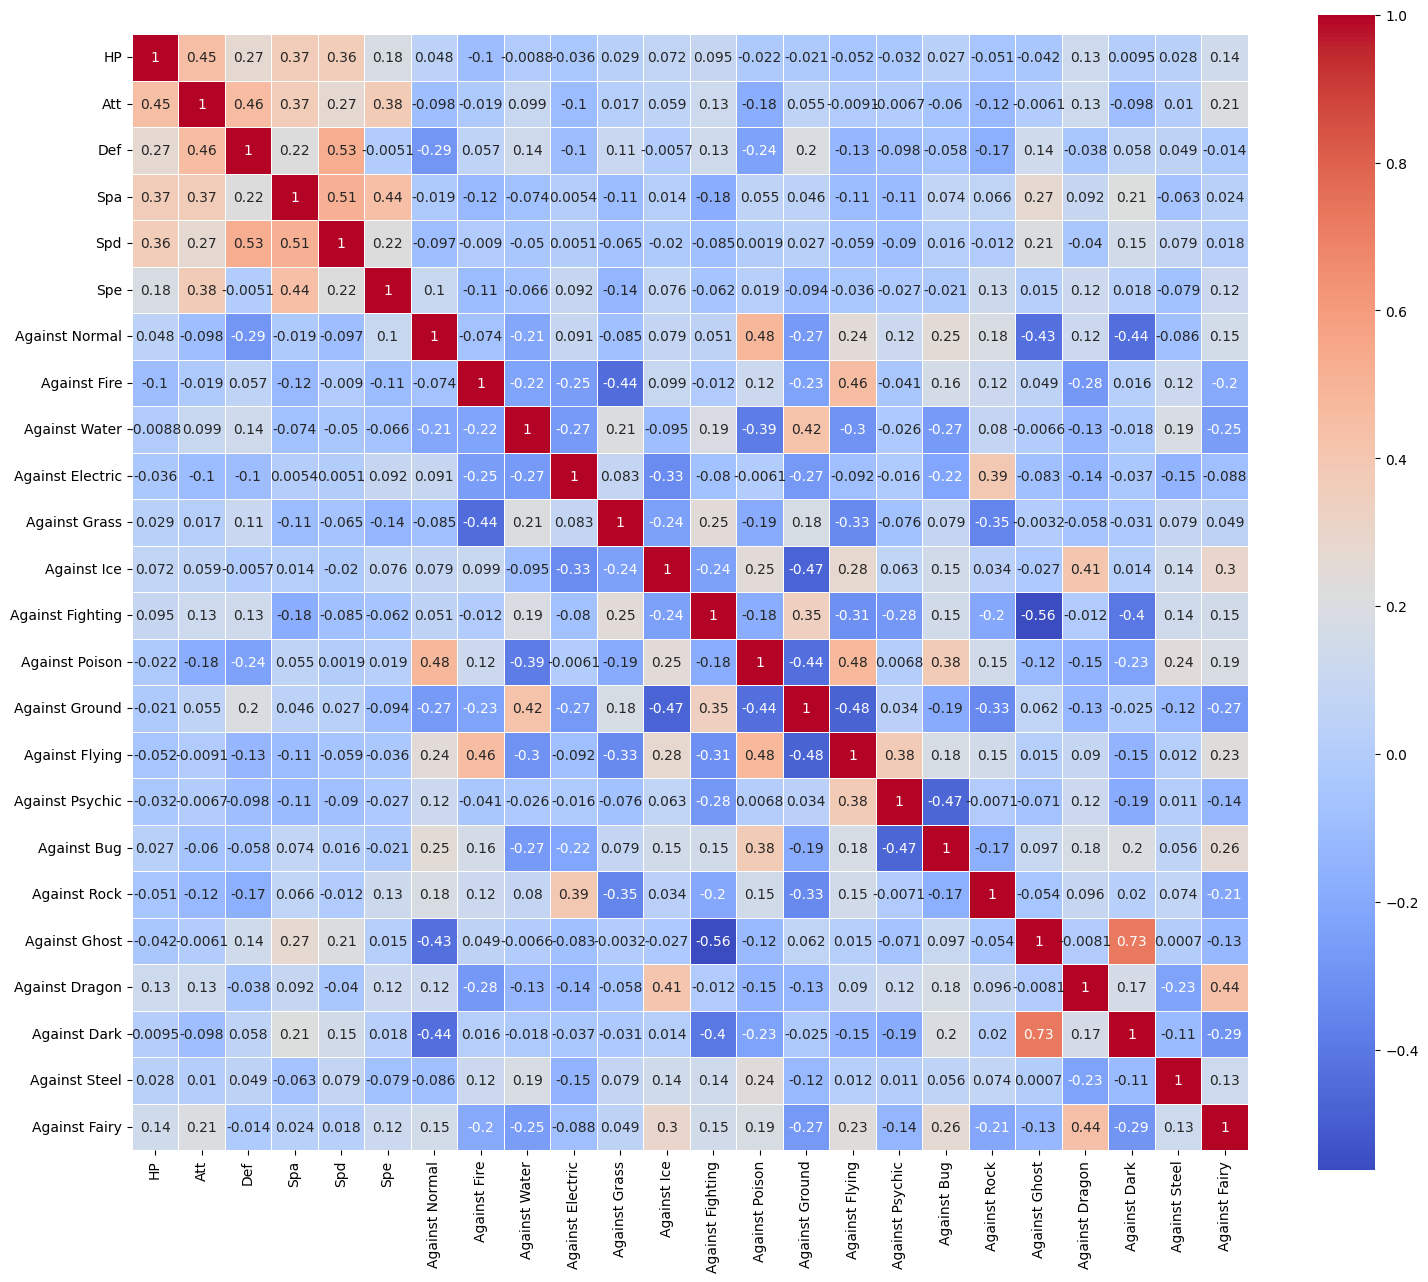

In [73]:
df_num = df.select_dtypes(include=[np.number])
cor = df_num.corr()

plt.subplots(figsize=(18,15))
sns.heatmap(cor,
            square = True,
            cmap="coolwarm",
            linewidths=0.5,
            annot = True)

In [74]:
df.columns

Index(['Name', 'Type 1', 'HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe',
       'Against Normal', 'Against Fire', 'Against Water', 'Against Electric',
       'Against Grass', 'Against Ice', 'Against Fighting', 'Against Poison',
       'Against Ground', 'Against Flying', 'Against Psychic', 'Against Bug',
       'Against Rock', 'Against Ghost', 'Against Dragon', 'Against Dark',
       'Against Steel', 'Against Fairy'],
      dtype='object')

In [75]:
df.head()

,Name,Type 1,HP,Att,Def,Spa,Spd,Spe,Against Normal,Against Fire,...,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy
0,Bulbasaur,Grass,45,49,49,65,65,45,1.0,2.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,Grass,60,62,63,80,80,60,1.0,2.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,Grass,80,82,83,100,100,80,1.0,2.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Mega Venusaur,Grass,80,100,123,122,120,80,1.0,2.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Charmander,Fire,39,52,43,60,50,65,1.0,0.5,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


## Séparation du dataset

In [76]:
lab_enc = LabelEncoder()

In [79]:
X = df.drop(columns=['Type 1'])
y = lab_enc.fit_transform(df['Type 1'])
print(X.shape)
print(y.shape)


(1032, 25)
(1032,)


In [80]:
df_encoded = X.copy()

In [81]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first', sparse_output=False), ['Name'])], remainder='passthrough')
X = pd.DataFrame(ct.fit_transform(df_encoded))
X.columns = ct.get_feature_names_out()
X.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("train X : ", X_train.shape)
print("test X : ", X_test.shape)


train X :  (722, 1055)
test X :  (310, 1055)


In [82]:
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X_test)

/var/www/html/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision de la Régression Logistique: {accuracy}")

Précision de la Régression Logistique: 0.8161290322580645


In [84]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [85]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Précision de la Random Forest: {rf_accuracy}")

Précision de la Random Forest: 0.8903225806451613


In [87]:
feature_importance = rf_model.feature_importances_
feature_names = X.columns

feat_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
})
feat_importance_df = feat_importance_df.sort_values(by='importance', ascending=False)
feat_importance_df.head()

,feature,importance
1050,remainder__Against Ghost,0.053192
1038,remainder__Against Fire,0.051820
1041,remainder__Against Grass,0.050598
1043,remainder__Against Fighting,0.047919
1046,remainder__Against Flying,0.047914


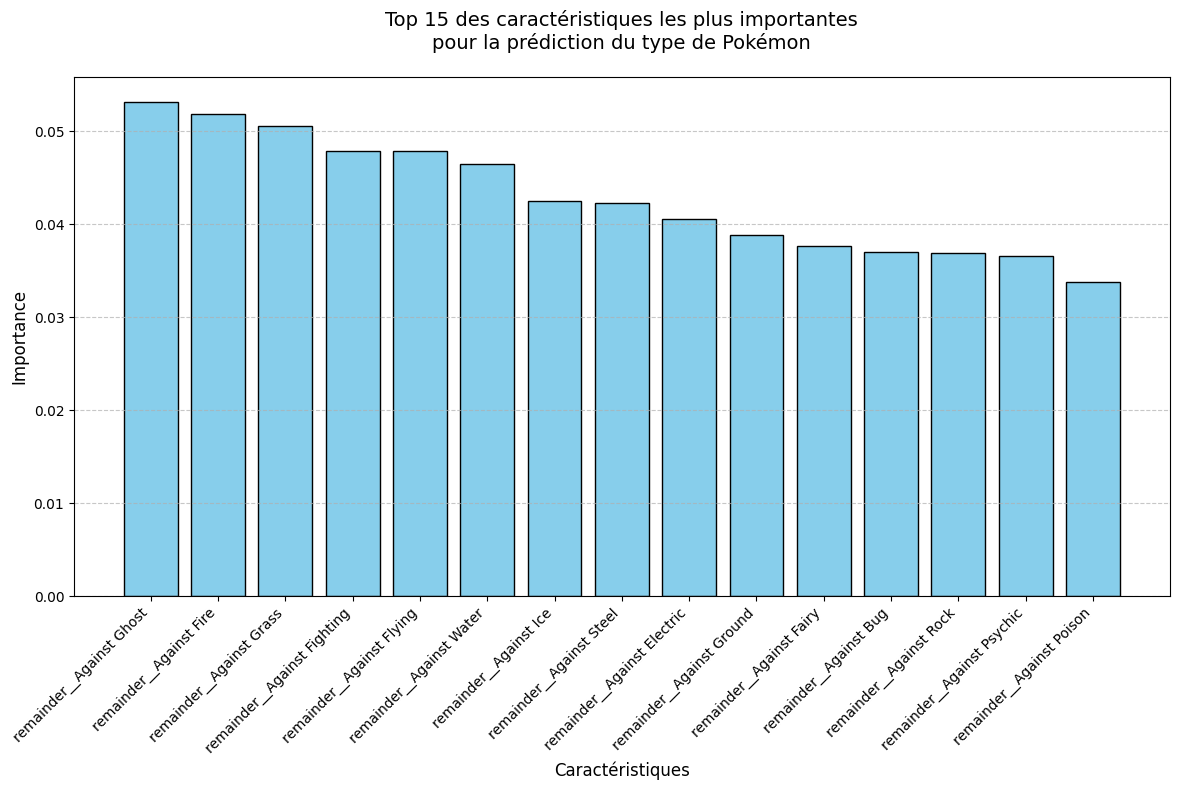

In [96]:
# Trier les importances par ordre décroissant et ne garder que les plus importantes
# (par exemple, les 15 premières caractéristiques)
n_features = 15
importance_df = feat_importance_df.head(n_features)

# Créer le graphique avec des paramètres améliorés
plt.figure(figsize=(12, 8))  # Augmenter la taille
plt.bar(
    importance_df['feature'],
    importance_df['importance'],
    color='skyblue',  # Ajouter une couleur
    edgecolor='black'  # Ajouter des bordures
)

# Améliorer la lisibilité des étiquettes
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Ajouter des labels et un titre
plt.xlabel('Caractéristiques', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Top 15 des caractéristiques les plus importantes\npour la prédiction du type de Pokémon', 
          fontsize=14, pad=20)

# Ajouter une grille horizontale pour faciliter la lecture
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajuster les marges pour éviter que les labels soient coupés
plt.tight_layout()

plt.show()

In [141]:
num_cols = ['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe',
       'Against Normal', 'Against Fire', 'Against Water', 'Against Electric',
       'Against Grass', 'Against Ice', 'Against Fighting', 'Against Poison',
       'Against Ground', 'Against Flying', 'Against Psychic', 'Against Bug',
       'Against Rock', 'Against Ghost', 'Against Dragon', 'Against Dark',
       'Against Steel', 'Against Fairy']
cat_cols = ['Name']

In [150]:
X = df[num_cols]
y = df['Type 1']

# 3. Train test split en gardant le format DataFrame
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=42
)

print("Type de X_train:", type(X_train))
print("Colonnes de X_train:", X_train.columns.tolist())

Type de X_train: <class 'pandas.core.frame.DataFrame'>
Colonnes de X_train: ['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe', 'Against Normal', 'Against Fire', 'Against Water', 'Against Electric', 'Against Grass', 'Against Ice', 'Against Fighting', 'Against Poison', 'Against Ground', 'Against Flying', 'Against Psychic', 'Against Bug', 'Against Rock', 'Against Ghost', 'Against Dragon', 'Against Dark', 'Against Steel', 'Against Fairy']


In [151]:
pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_cols)
])

X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

In [152]:
param_grid= {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = RandomForestClassifier(random_state=42)
grid_search= GridSearchCV(
    estimator= rf_grid,
    param_grid= param_grid,
    cv= 5,
    scoring= 'accuracy',
    n_jobs= -1
)
grid_search.fit(X_train_transformed, y_train)

print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score de validation croisée:", grid_search.best_score_)

Meilleurs paramètres: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Meilleur score de validation croisée: 0.8848484848484848


In [154]:
best_rf = grid_search.best_estimator_
y_pred_optimized = best_rf.predict(X_test_transformed)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"Score sur l'ensemble de test avec le modèle optimisé: {optimized_accuracy}")

Score sur l'ensemble de test avec le modèle optimisé: 0.9227053140096618


In [155]:
final_rf = RandomForestClassifier(
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

final_rf.fit(X_train, y_train) 

RandomForestClassifier(max_depth=30, n_estimators=300, random_state=42)

In [156]:
y_pred_final = final_rf.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Score sur l'ensemble de test avec le modèle final: {final_accuracy}")

Score sur l'ensemble de test avec le modèle final: 0.9178743961352657


In [157]:
with open('../models/best_model.pkl', 'wb') as f:
    pickle.dump(final_rf, f)

In [159]:
with open("../models/pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

In [160]:
pokemon_dict = {}

for index, row in df.iterrows():
    pokemon_dict[row["Name"]] = {
        "hp": row["HP"],
        "att": row["Att"],
        "def": row["Def"],
        "spd": row["Spd"],
        "spe": row["Spe"],
        "against_normal": row["Against Normal"],
        "against_fire": row["Against Fire"],
        "against_water": row["Against Water"],
        "against_electric": row["Against Electric"],
        "against_grass": row["Against Grass"],
        "against_ice": row["Against Ice"],
        "against_fighting": row["Against Fighting"],
        "against_poison": row["Against Poison"],
        "against_ground": row["Against Ground"],
        "against_flying": row["Against Flying"],
        "against_psychic": row["Against Psychic"],
        "against_bug": row["Against Bug"],
        "against_rock": row["Against Rock"],
        "against_ghost": row["Against Ghost"],
        "against_dragon": row["Against Dragon"],
        "against_dark": row["Against Dark"],
        "against_steel": row["Against Steel"],
        "against_fairy": row["Against Fairy"]
    }

In [161]:
with open("../models/pokemon_dict.pkl", "wb") as f:
    pickle.dump(pokemon_dict, f)